# Single Stair Fitter

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

## Visualizing Input Data
The input data is given as the negative space of the surface of the stair step.

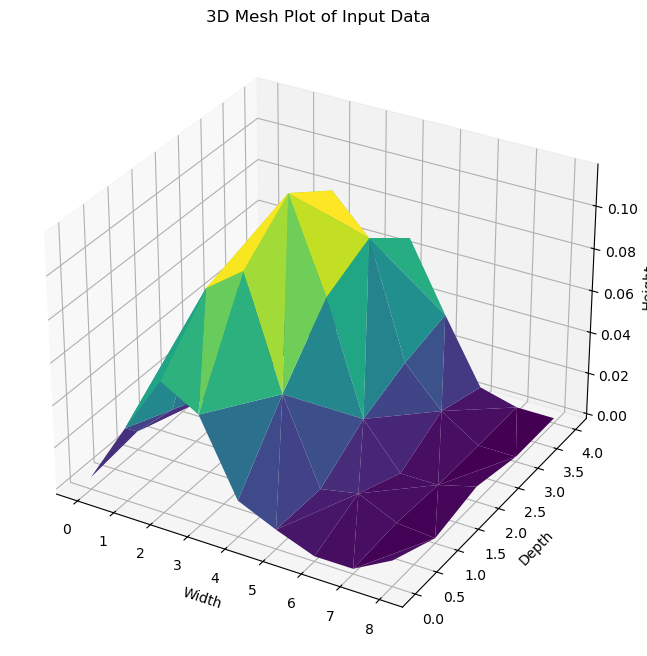

In [117]:
# Load the CSV file
file_path = "data/fuzzedGaussian.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure the data satisfies the bounds
max_x, max_y, max_h = 8, 4, 0.2  # Define your max values
data = data[(data["X"] <= max_x) & (data["Y"] <= max_y) & (data["H"] <= max_h)]
X, Y, H = data['X'], data['Y'], data['H']

# Create a 3D mesh plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, H, cmap="viridis", edgecolor="none")
ax.set_xlabel("Width")
ax.set_ylabel("Depth")
ax.set_zlabel("Height")
plt.title("3D Mesh Plot of Input Data")
plt.show()

# Stair Height
stair_height = 1
stair_H = stair_height - H

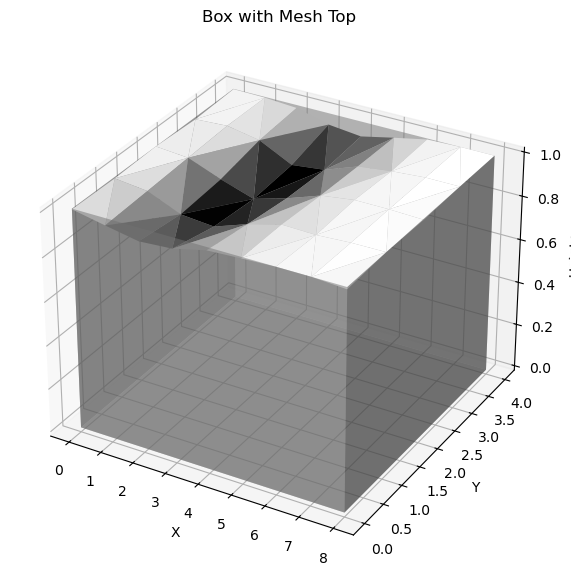

In [129]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the box - bottom and four side walls
# Bottom rectangle (0,0,0) to (max_x, max_y, 0)
ax.plot_surface([[0, max_x], [0, max_x]], [[0, 0], [max_y, max_y]], np.zeros((2, 2)), color='gray', alpha=0.5)

# Side walls (4 vertical walls)
ax.plot_surface(np.array([[0, 0], [0, 0]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[0, 0], [0, 0]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[max_y, max_y], [max_y, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[max_x, max_x], [max_x, max_x]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)

# Top mesh surface (X, Y, stair_H)
ax.plot_trisurf(X, Y, stair_H, cmap='gray', edgecolor='none')

# Set labels
ax.set_title('Box with Mesh Top')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()

## Fitting Data
This fits the data to a Gaussian distribution.

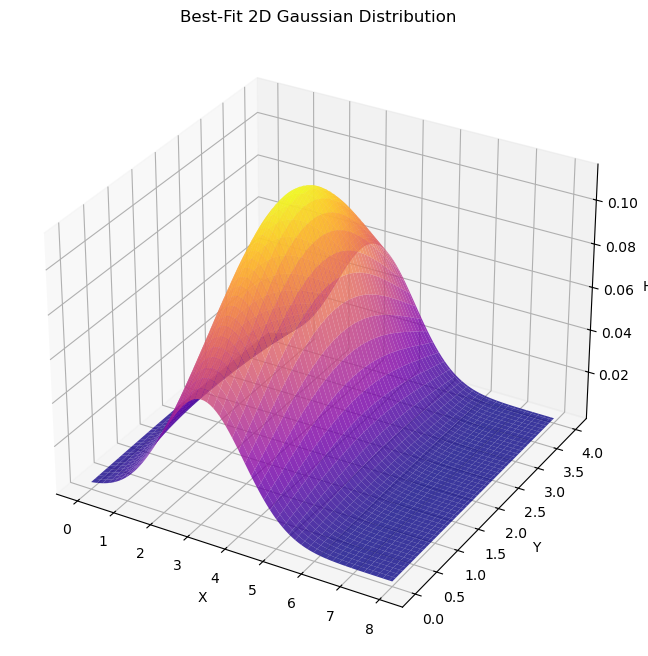

In [131]:
# Define a 2D Gaussian function
def gaussian_2d(XY, a, x0, y0, sigma_x, sigma_y):
    x, y = XY
    return a * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

# Fit data to the 2D Gaussian
x = data["X"].values
y = data["Y"].values
h = data["H"].values
initial_guess = (np.max(h), np.mean(x), np.mean(y), np.std(x), np.std(y))
params, _ = curve_fit(gaussian_2d, (x, y), h, p0=initial_guess)

# Generate a fine mesh for the Gaussian
x_mesh = np.linspace(0, max_x, 100)
y_mesh = np.linspace(0, max_y, 100)
x_grid, y_grid = np.meshgrid(x_mesh, y_mesh)
h_fit = gaussian_2d((x_grid.ravel(), y_grid.ravel()), *params).reshape(x_grid.shape)

# Create a 3D plot of the best-fit Gaussian
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, h_fit, cmap="plasma", edgecolor="none", alpha=0.8)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("H")
plt.title("Best-Fit 2D Gaussian Distribution")
plt.show()

In [147]:
stair_h_fit = stair_height - h_fit
stair_h_fit

array([[0.99900543, 0.99877501, 0.99849954, ..., 0.99999622, 0.99999728,
        0.99999805],
       [0.99897719, 0.99874023, 0.99845693, ..., 0.99999611, 0.9999972 ,
        0.999998  ],
       [0.99894874, 0.99870518, 0.998414  , ..., 0.999996  , 0.99999712,
        0.99999794],
       ...,
       [0.99888909, 0.99863171, 0.99832401, ..., 0.99999578, 0.99999696,
        0.99999782],
       [0.9989179 , 0.9986672 , 0.99836748, ..., 0.99999589, 0.99999704,
        0.99999788],
       [0.99894655, 0.99870249, 0.99841071, ..., 0.999996  , 0.99999712,
        0.99999794]])

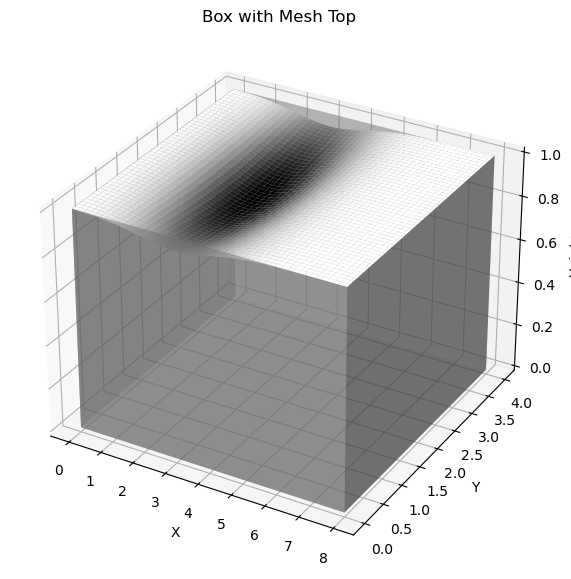

In [151]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the box - bottom and four side walls
# Bottom rectangle (0,0,0) to (max_x, max_y, 0)
ax.plot_surface([[0, max_x], [0, max_x]], [[0, 0], [max_y, max_y]], np.zeros((2, 2)), color='gray', alpha=0.5)

# Side walls (4 vertical walls)
ax.plot_surface(np.array([[0, 0], [0, 0]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[0, 0], [0, 0]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[max_y, max_y], [max_y, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[max_x, max_x], [max_x, max_x]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)

# Top mesh surface (x_grid, y_grid, stair_H)
ax.plot_surface(x_grid, y_grid, stair_h_fit, cmap='gray', edgecolor='none')

# Set labels
ax.set_title('Box with Mesh Top')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()

# Visualization of Stair Step